In [1]:
import scipy.optimize as spyopt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class report:
    def __init__(self,initial_guess):
        self.initial_guess = initial_guess
        self.store = initial_guess
        
    def reporter(self,p):
        self.store = np.vstack((self.store, p))
    
    def check_lim(self):
        xlim = np.array([self.initial_guess[0],self.initial_guess[0]])
        for coord in self.store:
            if xlim[0] > coord[0]:
                xlim[0] = coord[0]
            if xlim[1] < coord[0]:
                xlim[1] = coord[0]
        self.xlim = xlim   
        
        ylim = np.array([self.initial_guess[1],self.initial_guess[1]])
        for coord in self.store:
            if ylim[0] > coord[1]:
                ylim[0] = coord[1]
            if ylim[1] < coord[1]:
                ylim[1] = coord[1]
        self.ylim = ylim  

In [3]:
inital_guess = np.array([-1,1])
my_report = report(inital_guess)
NM = spyopt.minimize(spyopt.rosen,inital_guess,method="Powell",  callback=my_report.reporter)

In [4]:
my_report.check_lim()

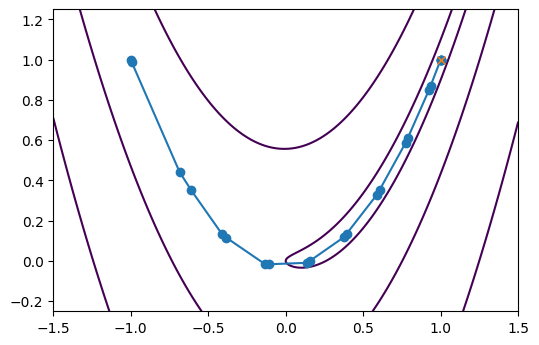

In [5]:
fig, ax = plt.subplots(dpi=100)
xsize = abs(my_report.xlim[0] - my_report.xlim[1])
ysize = abs(my_report.ylim[0] - my_report.ylim[1])
x = np.linspace(my_report.xlim[0]-xsize/4,my_report.xlim[1]+xsize/4,2001)
y = np.linspace(my_report.ylim[0]-ysize/4,my_report.ylim[1]+ysize/4,2001)
x_coord, y_coord = np.meshgrid(x,y)
f = lambda x,y: spyopt.rosen([x, y])
z_coord = f(x_coord,y_coord)
ax.contour(x_coord,y_coord, z_coord, np.arange(12)**5)

ax.plot(my_report.store[:, 0], my_report.store[:, 1], '-o')
ax.plot(NM["x"][0], NM["x"][1],"x")

In [6]:
my_report.store

array([[-1.        ,  1.        ],
       [-0.99496627,  0.98995787],
       [-0.68500905,  0.4421613 ],
       [-0.60943916,  0.35070096],
       [-0.40916553,  0.13136747],
       [-0.38278445,  0.11533191],
       [-0.13430372, -0.01556957],
       [-0.1104105 , -0.01655125],
       [ 0.13530793, -0.00931812],
       [ 0.15729509,  0.00103741],
       [ 0.37390315,  0.11729802],
       [ 0.39378722,  0.13591433],
       [ 0.58848055,  0.32930236],
       [ 0.60588159,  0.35278107],
       [ 0.77403419,  0.58769272],
       [ 0.78807998,  0.61172204],
       [ 0.92558417,  0.85137508],
       [ 0.93507245,  0.87027546],
       [ 0.99995083,  0.99983972],
       [ 0.99999187,  0.9999736 ],
       [ 1.        ,  1.        ],
       [ 1.        ,  1.        ]])